# Optical Character Recognition

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings("ignore")

In [8]:
def get_image_paths(root_folder, valid_extensions=('.jpg', '.png')):
    image_paths = []
    
    for root, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith(valid_extensions):
                image_paths.append(os.path.join(root, file))
    
    return image_paths

def get_image_pixels(image_path):
    try:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        pixels = np.array(image)
        return pixels
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return None

def get_image_name(file_name):
    name_parts = file_name.split('_')
    if len(name_parts) >= 3:
        return name_parts[1].upper()
    return file_name


def create_image_dataframe(root_folder):
    image_paths = get_image_paths(root_folder)
    data = []
    
    for image_path in image_paths:
        pixels = get_image_pixels(image_path)
        if pixels is not None:
            image_name = get_image_name(os.path.basename(image_path))
            data.append([image_path, pixels, image_name])
    
    df = pd.DataFrame(data, columns=['Image_Path', 'Pixels', 'Text'])
    return df

In [9]:
root_folder = 'Image-text'
images_df = create_image_dataframe(root_folder)

In [10]:
images_df

,Image_Path,Pixels,Text
0,Image-text\2219\3\100_NECTARINES_51169.jpg,"[[67, 65, 72, 66, 66, 73, 59, 71, 67, 65, 62, ...",NECTARINES
1,Image-text\2219\3\101_chlorinating_13352.jpg,"[[215, 215, 215, 215, 215, 215, 216, 216, 213,...",CHLORINATING
2,Image-text\2219\3\102_PERSISTENT_56854.jpg,"[[69, 72, 73, 65, 68, 69, 84, 66, 65, 72, 72, ...",PERSISTENT
3,Image-text\2219\3\103_cagily_10760.jpg,"[[98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, ...",CAGILY
4,Image-text\2219\3\104_Gp_33280.jpg,"[[125, 126, 126, 127, 128, 132, 137, 141, 147,...",GP
...,...,...,...
42071,Image-text\2233\6\5_MAURITIAN_47224.jpg,"[[69, 84, 69, 68, 80, 74, 71, 69, 72, 73, 78, ...",MAURITIAN
42072,Image-text\2233\6\6_Preachment_59410.jpg,"[[106, 105, 104, 104, 104, 104, 104, 104, 105,...",PREACHMENT
42073,Image-text\2233\6\7_trouncers_80874.jpg,"[[237, 242, 225, 214, 229, 239, 237, 242, 238,...",TROUNCERS
42074,Image-text\2233\6\8_legitimacy_43975.jpg,"[[122, 128, 122, 119, 123, 125, 126, 123, 126,...",LEGITIMACY


In [30]:
images_df.to_csv('images_df.csv', index=False)

In [2]:
images_df = pd.read_csv('images_df.csv')

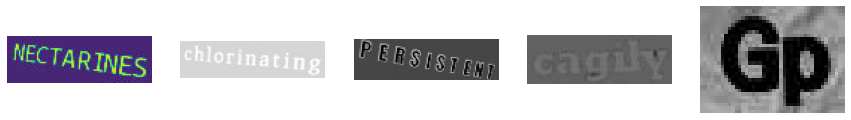

In [3]:
import matplotlib.image as mpimg

image_paths = images_df['Image_Path'].head(5)

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, path in enumerate(image_paths):
    img = mpimg.imread(path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()

In [50]:
def display_image_stats(dataframe):
    widths = []
    heights = []

    for image_path in dataframe['Image_Path']:
        try:
            image = Image.open(image_path)
            width, height = image.size
            widths.append(width)
            heights.append(height)
        except Exception as e:
            print(f"Error processing {image_path}: {str(e)}")

    # Display descriptive statistics
    print("Width Statistics:")
    print(pd.Series(widths).describe())
    
    print("\nHeight Statistics:")
    print(pd.Series(heights).describe())
    
    # Create and display histograms
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title('Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title('Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    # Calculate the 90th percentiles
    height_percentile_90 = np.percentile(heights, 90)
    width_percentile_90 = np.percentile(widths, 90)

    print(f"90th percentile of image heights: {height_percentile_90:.2f} pixels")
    print(f"90th percentile of image widths: {width_percentile_90:.2f} pixels")

Width Statistics:
count    42076.000000
mean       116.227564
std         42.450116
min          1.000000
25%         87.000000
50%        110.000000
75%        138.000000
max        670.000000
dtype: float64

Height Statistics:
count    42076.000000
mean        31.037527
std          0.353028
min          9.000000
25%         31.000000
50%         31.000000
75%         31.000000
max         32.000000
dtype: float64


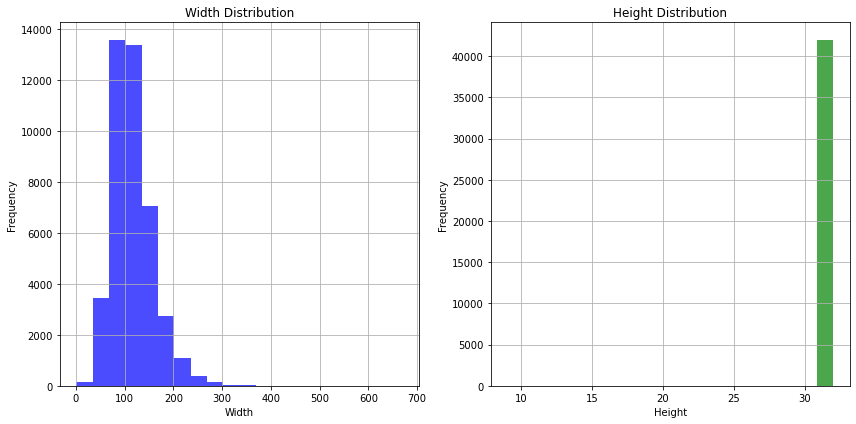

90th percentile of image heights: 31.00 pixels
90th percentile of image widths: 171.00 pixels


In [51]:
display_image_stats(images_df)

In [25]:
def plot_text_distribution(dataframe, column_name):
    # Extract the string lengths from the specified column
    string_lengths = dataframe[column_name].apply(len)

    # Calculate the most frequent string lengths (top 3)
    top_lengths = string_lengths.value_counts().head(3)
    top_percentages = (top_lengths / len(string_lengths)) * 100

    # Create subplots
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

    # Plot the histogram
    ax1.hist(string_lengths, bins=20, color='skyblue', alpha=0.7)
    ax1.set_title(f'Distribution of String Lengths in {column_name}')
    ax1.set_xlabel('String Length')
    ax1.set_ylabel('Frequency')
    ax1.grid(True)

    # Plot the CDF
    sorted_lengths = sorted(string_lengths)
    cdf = [i / len(sorted_lengths) for i in range(len(sorted_lengths))]
    ax2.plot(sorted_lengths, cdf, color='green')
    ax2.set_title(f'CDF of String Lengths in {column_name}')
    ax2.set_xlabel('String Length')
    ax2.set_ylabel('CDF')
    ax2.grid(True)

    # Plot the box plot
    sns.boxplot(y=string_lengths, ax=ax3, color='orange')
    ax3.set_title(f'Box Plot of String Lengths in {column_name}')
    ax3.set_ylabel('String Length')
    ax3.grid(True)

    # Plot the most frequent string lengths
    ax4.bar(top_lengths.index.astype(str), top_percentages, color='purple')
    ax4.set_title('Most Frequent String Lengths')
    ax4.set_xlabel('String Length')
    ax4.set_ylabel('Percentage')
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

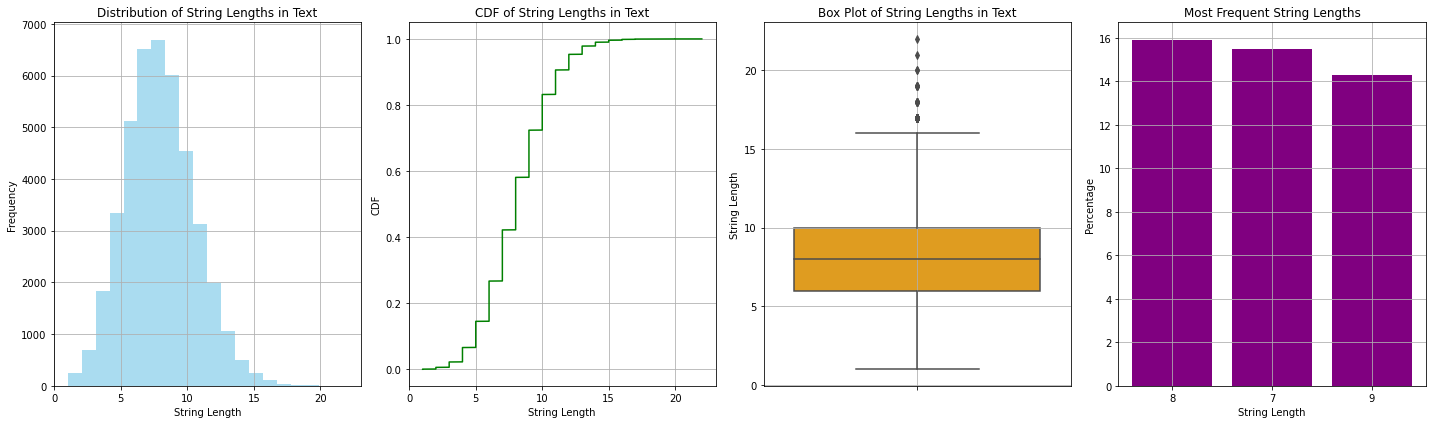

In [26]:
plot_text_distribution(images_df, 'Text')

In [27]:
def contains_number(text):
    return any(char.isdigit() for char in text)

def detect_number_perc(dataframe, column_name):
    # Apply the 'contains_number' function to the specified column
    dataframe['Contains_Number'] = dataframe[column_name].apply(contains_number)

    # Calculate the percentage of strings containing numbers
    contains_number_percentage = (dataframe['Contains_Number'].sum() / len(dataframe)) * 100
    does_not_contain_number_percentage = 100 - contains_number_percentage

    # Create a pie chart
    labels = ['Contains Number', 'Does Not Contain Number']
    sizes = [contains_number_percentage, does_not_contain_number_percentage]
    colors = ['lightblue', 'lightcoral']
    explode = (0.1, 0) 

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'Percentage of Strings Containing Numbers in {column_name}')
    plt.axis('equal')  

    plt.show()

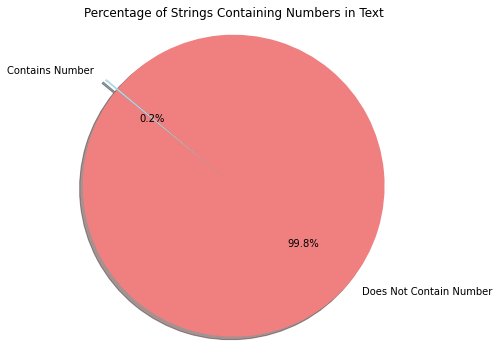

In [28]:
detect_number_perc(images_df, 'Text')

In [3]:
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 "

class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [4]:
# define params
height = 32
width = 171
channels = 1
num_classes = len(characters)
batch_size = 16
max_length = 22

In [5]:
import keras
from keras.layers import Input, Conv2D, Dense, MaxPooling2D
from keras.layers import Flatten, Activation, Bidirectional
from keras.layers import BatchNormalization, Dropout
from keras.layers import Reshape
from keras.models import Model
from keras.layers import LSTM

def build_model(input_shape, num_classes):
    # input layer
    model_input =Input(shape=input_shape,name='img_input',dtype='float32')
    labels = layers.Input(name="label", shape=[max_length], dtype="float32")

    # Convolution layer 
    model = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(model_input) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max1')(model) 

    model = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max2')(model) 

    model = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(model)
    model = Dropout(0.25)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max3')(model)  

    model = Conv2D(256, (3, 3), padding='same', name='conv4')(model)
    model = Dropout(0.25)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max4')(model)
    
    model = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con5')(model)
    model = Dropout(0.25)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)    

    # CNN to RNN
    model = Reshape(target_shape=(((width//4), (height//16)*512)), name='reshape')(model)  
    model = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(model)  
    model = Dropout(0.25)(model)
                    
    # RNN layer
    model=Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum')(model)
    model=Bidirectional(LSTM(128, return_sequences=True, kernel_initializer='he_normal'), merge_mode='concat')(model)
                    
    # transforms RNN output to character activations:
    model = Dense(num_classes, activation = 'softmax', kernel_initializer='he_normal',name='dense2')(model) 
                    
    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, model)
                    
    # Define the model
    model = Model(inputs=[model_input, labels], outputs=output, name="ocr_model")
                    
    # Optimizer
    opt = keras.optimizers.Adam()
    
    # Compile the model and return
    model.compile(optimizer=opt)
    return model

In [6]:
model = build_model((width, height, 1), num_classes+1)
model.summary()

Model: "ocr_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 171, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1 (Conv2D)                 (None, 171, 32, 32)  320         ['img_input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 171, 32, 32)  128        ['conv1[0][0]']                  
 alization)                                                                                       
                                                                                          

In [7]:
def split_data(images, labels, train_size=0.8, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid

# Splitting data into training and validation sets
X_train, X_valid, y_train, y_valid = split_data(np.array(images_df['Image_Path']), np.array(images_df['Text']))

In [8]:
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [height, width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Pad labels so they have same length which is max length
    label = tf.pad(label, paddings=[[0, max_length - tf.shape(label)[0]]], constant_values=len(characters))
    label = tf.cast(label, tf.int64)
    # 8. Return a dict as our model is expecting two inputs
    return {"img_input": img, "label": label}

In [9]:
X_train = X_train.astype('<U54')
y_train = y_train.astype('<U22')

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [10]:
X_valid = X_valid.astype('<U54')
y_valid = y_valid.astype('<U22')

val_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
val_dataset = (
    val_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [11]:
epochs = 10
early_stopping_patience = 5

# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

checkpoint_path = "ocr_model.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/10
2104/2104 [==============================] - 1101s 521ms/step - loss: 22.0762 - val_loss: 12.1682
Epoch 2/10
2104/2104 [==============================] - 1137s 540ms/step - loss: 7.9980 - val_loss: 5.2777
Epoch 3/10
2104/2104 [==============================] - 1072s 510ms/step - loss: 5.2646 - val_loss: 4.0649
Epoch 4/10
2104/2104 [==============================] - 1067s 507ms/step - loss: 4.3942 - val_loss: 3.5358
Epoch 5/10
2104/2104 [==============================] - 1227s 583ms/step - loss: 3.8827 - val_loss: 3.3142
Epoch 6/10
2104/2104 [==============================] - 1341s 637ms/step - loss: 3.4993 - val_loss: 3.1885
Epoch 7/10
2104/2104 [==============================] - 1355s 644ms/step - loss: 3.2325 - val_loss: 3.0357
Epoch 8/10
2104/2104 [==============================] - 768s 365ms/step - loss: 3.0101 - val_loss: 2.9243
Epoch 9/10
2104/2104 [==============================] - 514s 245ms/step - loss: 2.8820 - val_loss: 2.7910
Epoch 10/10
2104/2104 [==============

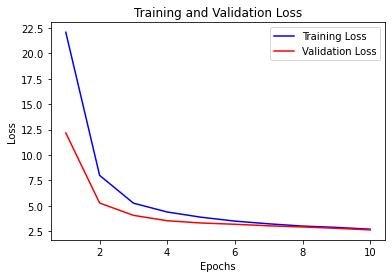

In [12]:
# Extract the loss values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="img_input").input, model.get_layer(name="dense2").output
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

# A utility function to decode the output of the network and remove [UNK] characters
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        decoded_text = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        # Remove [UNK] characters added for padding to max_length
        cleaned_text = decoded_text.replace('[UNK]', '')
        output_text.append(cleaned_text)
    return output_text


In [14]:
def calculate_letter_accuracy(predicted_text, ground_truth_text):
    # Preprocess texts: convert to lowercase and remove unwanted characters
    predicted_text = predicted_text.lower().replace('[unk]', '').replace(' ', '')
    ground_truth_text = ground_truth_text.lower().replace(' ', '')

    # Calculate accuracy
    num_correct = sum(p == g for p, g in zip(predicted_text, ground_truth_text))
    accuracy = num_correct / len(ground_truth_text) * 100.0

    return accuracy

1/1 [==============================] - 2s 2s/step


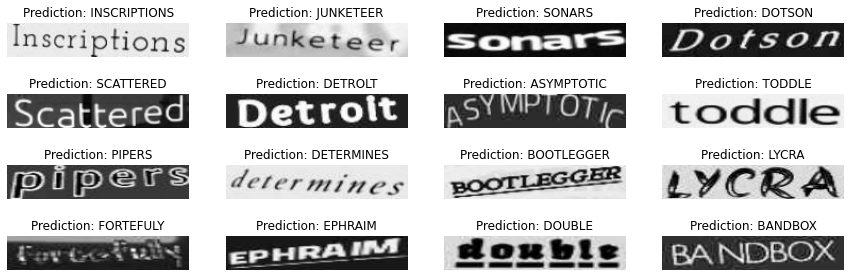

Overall Letter Accuracy for the Batch: 97.23%


In [15]:
#  Let's check results on some validation samples
total_accuracy = 0.0  # Initialize total accuracy for the batch
num_samples = 0  # Initialize the number of samples in the batch

for batch in val_dataset.take(1):
    batch_images = batch["img_input"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

        # Calculate accuracy for each sample and accumulate the total accuracy
        sample_accuracy = calculate_letter_accuracy(pred_texts[i], orig_texts[i])
        total_accuracy += sample_accuracy
        num_samples += 1

plt.show()

# Calculate the average letter accuracy for the whole batch
if num_samples > 0:
    batch_accuracy = total_accuracy / num_samples
    print("Overall Letter Accuracy for the Batch: {:.2f}%".format(batch_accuracy))
else:
    print("No samples in the batch.")
    